# Summary Statistics 

In [1]:
%matplotlib inline

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from collections import Counter

sys.path.append(os.path.dirname(os.getcwd()))
from sentence import Sentence

## Loading the data


In [2]:
with open('../data/cdt.epe') as train_file, open('../data/cdd.epe') as dev_file:
    train = [Sentence.from_json(line) for line in train_file]
    dev = [Sentence.from_json(line) for line in dev_file]
sentences = train + dev

## All negation cues

In [3]:
cues = []
for sent in sentences:
    sent_cues = [(token.lower(), tag) for token, tag in zip(sent.forms, sent.tags)
                 if tag in (Sentence.Tag.C, Sentence.Tag.A)]
    scope_size = sum([tag == Sentence.Tag.F for tag in sent.tags])

    if len(sent_cues) > 1:
        cues.append(('/'.join([x for x, _ in sent_cues]), 'MUL', scope_size))
    elif sent_cues:
        if sent_cues[0][1] == Sentence.Tag.A:
            cues.append((sent_cues[0][0], 'AFFIX', scope_size))
        else:
            cues.append((sent_cues[0][0], 'CUE', scope_size))

cues = pd.DataFrame(cues, columns=['tokens', 'type', 'scope_size'])
cues = cues.groupby(['tokens', 'type']).agg({'mean', 'count'})
cues.columns = cues.columns.droplevel(level=0)
cues = cues.rename(columns={"mean": "mean scope len"})
cues = cues.sort_values(by=['count'], ascending=False)
cues = cues.round({"mean scope len": 2})
cues = cues.reset_index()

with open('../report/cues.tex', 'w') as f:
    cues[:10].to_latex(f)

cues.head(10)

,tokens,type,mean scope len,count
0,not,CUE,8.55,398
1,no,CUE,5.68,258
2,n't,CUE,7.86,85
3,nothing,CUE,7.15,71
4,never,CUE,8.97,69
5,without,CUE,4.39,31
6,none,CUE,3.58,12
7,impossible,AFFIX,8.09,11
8,nor,CUE,14.80,10
9,unable,AFFIX,7.25,8


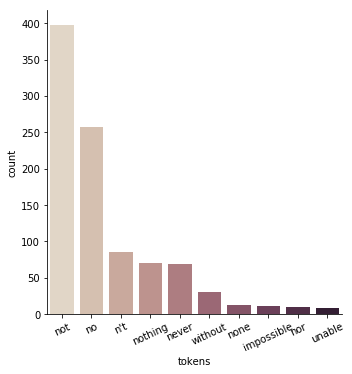

In [4]:
g = sns.catplot(x="tokens", y="count", data=cues[:10], kind="bar", palette="ch:.25")
g.set_xticklabels(rotation=25)
plt.savefig('../figures/negation_count.png')

## Multi-token cues

In [5]:
mul_cues = cues[cues['type'] == 'MUL'].reset_index(drop=True)
mul_cues = mul_cues[['tokens', 'mean scope len', 'count']]

with open('../report/mul_cues.tex', 'w') as f:
    mul_cues[:10].to_latex(f)

mul_cues.head(10)

,tokens,mean scope len,count
0,neither/nor,8.0,4
1,by/no/means,2.0,4
2,on/the/contrary,0.0,2
3,not/not,14.0,1
4,rather/than,8.0,1
5,nothing/at/all,0.0,1
6,not/for/the/world,0.0,1
7,no/nor,8.0,1
8,no/more,8.0,1


## Affix cues

In [6]:
affix_cues = cues[cues['type'] == 'AFFIX'].reset_index(drop=True)
affix_cues = affix_cues[['tokens', 'mean scope len', 'count']]

with open('../report/affix_cues.tex', 'w') as f:
    affix_cues[:10].to_latex(f)

affix_cues.head(10)

,tokens,mean scope len,count
0,impossible,8.09,11
1,unable,7.25,8
2,unknown,2.86,7
3,unhappy,4.83,6
4,unlikely,11.50,4
5,unpleasant,5.25,4
6,useless,7.25,4
7,motionless,3.00,3
8,unambitious,3.33,3
9,imprudent,5.33,3
